<a href="https://colab.research.google.com/github/ardalanebrahimi/EDU/blob/master/DML_Text2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_20newsgroups
from keras import preprocessing
from keras.layers import Embedding
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Input, Flatten, Dropout,InputLayer
from keras.models import Sequential
import matplotlib.pyplot as plt
from google.colab import drive
import zipfile
from keras.models import Model

Using TensorFlow backend.


In [0]:
embedding_layer = Embedding(1000, 64)
newsgroups = fetch_20newsgroups()

In [0]:
x = newsgroups.data
y = newsgroups.target

max_features = 20000
maxlen = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x)

sequences = tokenizer.texts_to_sequences(x)
print (sequences[0][:10])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
print (data.shape)
print (data[0][200:250])

y = to_categorical(np.array(y))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

VALIDATION_SPLIT = 0.2

indices = np.arange(data.shape[0])
np.random.shuffle(indices) 
data = data[indices] 
labels = y[indices] 
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])


x_train = data[:-nb_validation_samples] 
y_train = labels[:-nb_validation_samples] 
x_val = data[-nb_validation_samples:] 
y_val = labels[-nb_validation_samples:] 



[14, 4308, 1350, 15, 11126, 38, 250, 29, 42, 298]
Found 134142 unique tokens.
(11314, 100)
[]
Shape of data tensor: (11314, 100)
Shape of label tensor: (11314, 20)


In [0]:

print (x_train.shape)
print (y_train.shape)

print('Number of positive and negative reviews in traing and validation set ') 
print (y_train.sum(axis=0))
print (y_val.sum(axis=0))

(9052, 100)
(9052, 20)
Number of positive and negative reviews in traing and validation set 
[391. 478. 483. 490. 483. 476. 460. 451. 469. 465. 498. 457. 453. 477.
 465. 490. 431. 451. 383. 301.]
[ 89. 106. 108. 100.  95. 117. 125. 143. 129. 132. 102. 138. 138. 117.
 128. 109. 115. 113.  82.  76.]


In [0]:

#################################################
def train_val_by_metric(history,metric):
  history_dict = history.history
  #history_dict.keys()
  values = history_dict[metric]
  val_values = history_dict['val_'+metric]

  epochs = range(1, len(values) + 1)
  
  plt.plot(epochs, values, 'bo', label= 'Training '+metric)
  plt.plot(epochs, val_values, 'b', label= 'Validation '+metric)
  metricTitle = 'Loss' if metric == 'loss' else 'Accuracy'
  plt.title('Training and validation '+metricTitle)
  plt.xlabel('Epochs')
  plt.ylabel(metricTitle)
  plt.legend()

  plt.show()
###################################################
def train_val_res(history):
  train_val_by_metric(history,'loss')
  train_val_by_metric(history,'acc')

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                16020     
Total params: 96,020
Trainable params: 96,020
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 7241 samples, validate on 1811 samples
Epoch 1/10
7241/7241 [==============================] - 2s 305us/step - loss: 2.9777 - acc: 0.0989 - val_loss: 2.9525 - val_acc: 0.1447
Epoch 2/10
7241/7241 [==============================] - 0s 33us/step - loss: 2.8989 - acc: 0.2472 

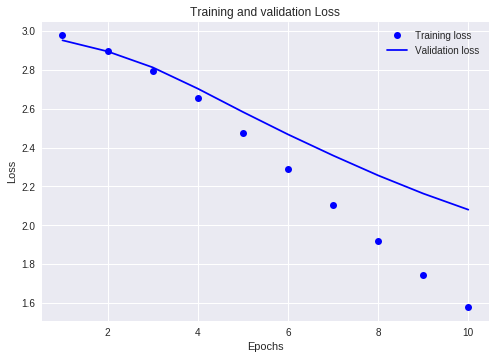

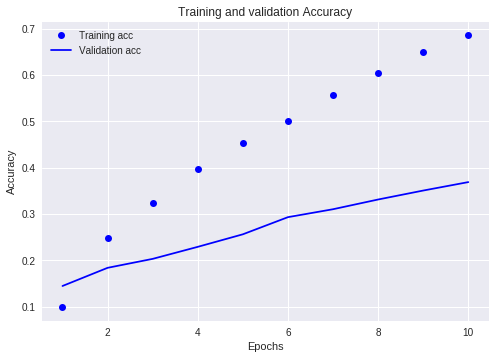

In [0]:
model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(20,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train,y_train,
                   epochs = 10,
                   batch_size=128,
                   validation_split=0.2)
train_val_res(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                16020     
Total params: 96,020
Trainable params: 96,020
Non-trainable params: 0
_________________________________________________________________
Train on 7241 samples, validate on 1811 samples
Epoch 1/40
7241/7241 [==============================] - 0s 56us/step - loss: 2.9759 - acc: 0.1030 - val_loss: 2.9474 - val_acc: 0.1358
Epoch 2/40
7241/7241 [==============================] - 0s 34us/step - loss: 2.8937 - acc: 0.2201 - val_loss: 2.8902 - val_acc: 0.1596
Epoch 3/40
7241/7241 [==============================] - 0s 32us/step - loss: 2.7921 

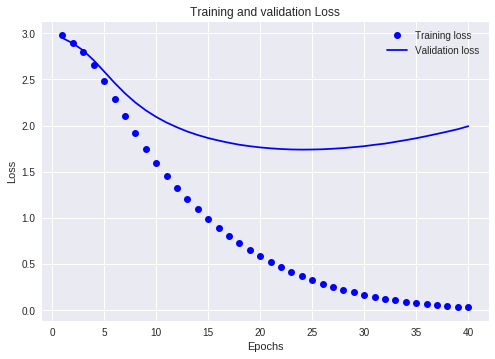

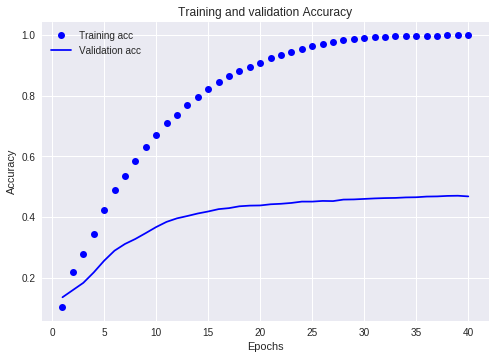

In [0]:
model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(20,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train,y_train,
                   epochs = 40,
                   batch_size=128,
                   validation_split=0.2)
train_val_res(history)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                51264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
___________________________

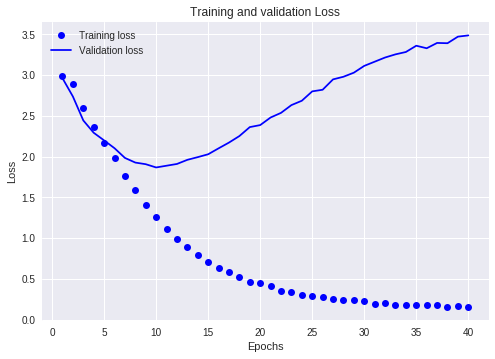

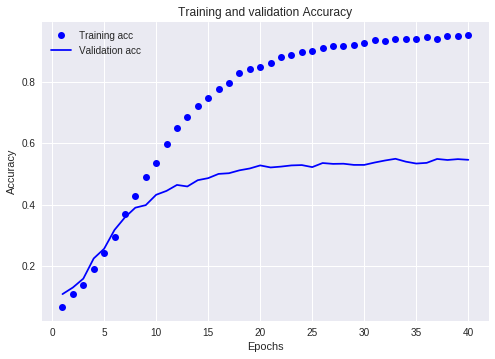

In [0]:
model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train,y_train,
                   epochs = 40,
                   batch_size=32,
                   validation_split=0.2)
train_val_res(history)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import urllib.request\
#urllib.request.urlretrieve('http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz', '/content/drive/My Drive/glove.6B.zip')

('/content/drive/My Drive/glove.6B.zip',
 <http.client.HTTPMessage at 0x7eff5ee68978>)

In [0]:
#with zipfile.ZipFile('/content/drive/My Drive/glove.6B.zip', 'r') as zip_ref:
#    zip_ref.extractall('/content/drive/My Drive/glove')

In [0]:

embeddings_index = {}

path = '/content/drive/My Drive/glove'

f = open(path+'/glove.6B.100d.txt')
for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print ()
print ('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [0]:
EMBEDDING_DIM = 100

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))

for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector

print (embedding_matrix.shape)

print (embedding_matrix[0][:10])

(134143, 100)
[0.95561555 0.04745917 0.55722316 0.21397918 0.32773542 0.71749337
 0.44374598 0.63772917 0.29779904 0.25418359]


In [0]:
sequence_input = Input(shape=(max_features,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Flatten()(embedded_sequences)
x = Dense(32, activation='relu')(x)
preds = Dense(20, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(x_train,y_train,
                   epochs = 40,
                   batch_size=128,
                   validation_split=0.2)
train_val_res(history)
model.save_weights('pre_trained_glove_model')

ValueError: ignored

In [0]:
embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM,
                            weights=[embedding_matrix], 
                            input_length=max_features, 
                            trainable=False)

#tf_input = Input(shape=(max_features,), dtype='int32')
sequence.pad_sequences(testArray, maxlen=maxlen)
model = Sequential()
#model.add(InputLayer(input_tensor=tf_input))
model.add(embedding_layer)
#model.add(Embedding(max_features,EMBEDDING_DIM,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(20,activation='softmax'))
model.summary()

#model.layers[0].set_weights([embedding_matrix])
#model.layers[0].trainable =0


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train,y_train,
                   epochs = 40,
                   batch_size=128,
                   validation_split=0.2)
train_val_res(history)
model.save_weights('pre_trained_glove_model')

NameError: ignored